<a href="https://colab.research.google.com/github/AwesomeBOBmusic/DataVisualization/blob/main/DataEngineeringProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

# read file from google drive as it is too large to upload and read on colab
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/zomato.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# check for null values in each feature
print(df.isnull().sum())

# check for duplicates
print('')
print(df.duplicated().sum())

# info about dataset
print('')
print(df.info())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name        

In [ ]:
# clean the url feature
from urllib.parse import urlparse, urlunparse

def clean_url(url):
    # parse url into components
    parsed = urlparse(url)

    # ensure scheme is HTTPS
    scheme = 'https'

    # normalize netloc as www.zomato
    if parsed.netloc != 'www.zomato.com':
        netloc = parsed.netloc
    else:
        netloc = 'www.zomato.com'

    # normalize path by removing extra spaces
    path = parsed.path.strip()

    # keep params and the remaining parameters required for the urlparse function the same
    params = parsed.params
    query = parsed.query
    fragment = parsed.fragment

    # construct the cleaned URL
    cleaned_url = urlunparse((scheme, netloc, path, params, query, fragment))

    # replace spaces with %20
    cleaned_url = cleaned_url.replace(' ' , '%20')

    return cleaned_url

df['clean_url'] = df['url'].apply(clean_url)

df['url'] = df['clean_url']
df.drop('clean_url' , axis = 1 , inplace = True)

clean the url to ensure consistency between all the urls in the dataset. the urlparse functions helps us to split the cleaning aspect to clean each part of the url. the scheme is used to ensure the scheme used for the urls remains https for all of them. the netloc checks the domain name of the website which is www.zomato.com in this case. the strip method removes any trailing spaces in the url. the params, query and fragment are kept the same. finally, all of these are joined together to reform a cleaned url.

In [ ]:
# remove extra spaces and trim trailing spaces in the name feature
df['name'] = df['name'].str.strip().str.replace(r'\s+' , ' ' , regex = True)

removes any trailing spaces from the name feature to ensure consistnecy in all values of the feature

In [ ]:
# check null and na values
print(df['online_order'].isnull().sum())
print(df['online_order'].isna().sum())

print(df['book_table'].isnull().sum())
print(df['book_table'].isna().sum())

# convert from object to boolean
df['online_order'] = df['online_order'].map({'Yes': True , 'No': False})
df['book_table'] = df['book_table'].map({'Yes': True , 'No': False})

# check changes
print(df['online_order'].dtype)
print(df['book_table'].dtype)

0
0
0
0
bool
bool


since order_online and book_table have boolean values, check if there are any na or null values. the dtype of them in the .info() was object so i converted them to boolean type and ensured the change was made

In [ ]:
# check all possible values in the feature
print(df['rate'].unique())
print(df['rate'].value_counts())
print((df['rate'] == '-').sum())

# ensure rate is of string type before using .str
df['rate'] = df['rate'].astype(str)

# remove the /5 and only keep the rating
df['rate'] = df['rate'].str.split('/').str[0]

# replace value NEW with rating 0
df['rate'] = df['rate'].replace('NEW' , '0')

# replace value - with nan , to be replaced with the mean
df['rate'] = df['rate'].replace('-', np.nan)

# rnsure rate is numeric after removing '/5' and replacing 'NEW'
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# replace nan values with the mean
df['rate'] = df['rate'].fillna(df['rate'].mean())

# round to 2 decimal places
df['rate'] = df['rate'].round(2)

df['rate'] = df['rate'].astype(float)

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']
rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64
69


In [ ]:
# fill missing values
df['phone'] = df['phone'].fillna('Not Available')

# replace line breaks with commas and remove spaces
df['phone'] = df['phone'].str.replace(r'\r\n' , ' , ' , regex=True)
df['phone'] = df['phone'].str.replace(r'\s+', '' , regex=True)

def clean_phone_number(phone):
    # replace invalid entries with nan
    if phone.startswith(('NotA', '000', '004', '006', '007', '008', '009')):
        return np.nan

    # normalize indian mobile numbers
    if phone.startswith('091'):
        return phone.replace('091' , '+91' , 1)

    # keep valid international or regional numbers
    if phone.startswith(('+91', '080', '022', '1800')):
        return phone

    # Mark other prefixes as invalid
    return np.nan

df['cleaned_phone'] = df['phone'].apply(clean_phone_number)
df['cleaned_phone'].fillna('Not Available', inplace=True)

# check unique prefixes after cleaning
print("Unique prefixes (first 3 chars):", df['cleaned_phone'].str.slice(0, 3).value_counts())
print("Unique prefixes (first 4 chars):", df['cleaned_phone'].str.slice(0, 4).value_counts())

# set cleaned column to phone column
df['phone'] = df['cleaned_phone']
df.drop('cleaned_phone' , axis = 1 , inplace = True)

Unique prefixes (first 3 chars): cleaned_phone
+91    35513
080    14405
Not     1629
180      125
022       45
Name: count, dtype: int64
Unique prefixes (first 4 chars): cleaned_phone
+919    20065
0804     9409
+918     9146
+917     5788
0802     3733
Not      1629
0806      666
+916      514
0803      458
1800      125
0807      113
0223       45
0805       24
0808        2
Name: count, dtype: int64


<ipython-input-7-377026eced0d>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cleaned_phone'].fillna('Not Available', inplace=True)


kept the country code value which was +91 (India). the rest of the prefixes were either the area codes for different areas in india or they don't exist. cleaned these values and replaced nan values with Not Available as i did not want to remove any rows from the column

In [ ]:
df['filled_location'] = df.groupby('listed_in(city)')['location'].transform(lambda x: x.fillna(x.mode()[0]))

df['location'] = df['filled_location']

print(df['location'].value_counts())
print(df['filled_location'].value_counts())

df.drop('filled_location' , axis = 1 , inplace = True)

location
BTM                      5134
HSR                      2524
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64
filled_location
BTM                      5134
HSR                      2524
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64


used imputation with the listed_in(city) column to fill the null values in the location column


In [ ]:
print(df['rest_type'].unique())

# fill na with Not Available
df['rest_type'].fillna('Not Available' , inplace = True)
df['rest_type'] = df['rest_type'].str.replace(r'\s+' , ' ' , regex = True)

# strip extra spaces
df['rest_type'] = df['rest_type'].str.strip()

print(df['rest_type'].unique())

['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbrewery'
 'Sweet Shop, Desser

<ipython-input-9-6a04c8f3f961>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rest_type'].fillna('Not Available' , inplace = True)


In [ ]:
print(df['dish_liked'].unique())

df['dish_liked'].fillna('Not Available' , inplace = True)
df['dish_liked'] = df['dish_liked'].str.replace(r'\s+' , ' ' , regex = True)
df['dish_liked'] = df['dish_liked'].str.strip()

print(df['dish_liked'].isna().sum())

['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani'
 'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza'
 ...
 'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian'
 'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani'
 'Biryani, Andhra Meal']


<ipython-input-10-316ce0e6e4da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dish_liked'].fillna('Not Available' , inplace = True)


0


In [ ]:
print(df['cuisines'].isna().sum())

df['cuisines'].fillna('Not Available' , inplace = True)
df['cuisines'] = df['cuisines'].str.replace(r'\s+' , ' ' , regex = True)
df['cuisines'] = df['cuisines'].str.strip()

print(df['cuisines'].isna().sum())

45
0


<ipython-input-11-3271706b3a59>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cuisines'].fillna('Not Available' , inplace = True)


In [ ]:
print(df['approx_cost(for two people)'].unique())

# convert all values to string in order to perform the string operations
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)

# remove commas and convert to numeric
df['approx_cost(for two people)']  = df['approx_cost(for two people)'].str.replace(',', '', regex=True)
df['approx_cost(for two people)']  = df['approx_cost(for two people)'].astype(float)

# fill nan values with the mean and convert to int
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean())
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

print(df['approx_cost(for two people)'].isna().sum())
print(df['approx_cost(for two people)'].unique())

['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80' '1,100' '160' '1,600' '230' '130' '50' '190' '1,700' nan '1,400'
 '180' '1,350' '2,200' '2,000' '1,800' '1,900' '330' '2,500' '2,100'
 '3,000' '2,800' '3,400' '40' '1,250' '3,500' '4,000' '2,400' '2,600'
 '120' '1,450' '469' '70' '3,200' '60' '560' '240' '360' '6,000' '1,050'
 '2,300' '4,100' '5,000' '3,700' '1,650' '2,700' '4,500' '140']
0
[ 800  300  600  700  550  500  450  650  400  900  200  750  150  850
  100 1200  350  250  950 1000 1500 1300  199   80 1100  160 1600  230
  130   50  190 1700  555 1400  180 1350 2200 2000 1800 1900  330 2500
 2100 3000 2800 3400   40 1250 3500 4000 2400 2600  120 1450  469   70
 3200   60  560  240  360 6000 1050 2300 4100 5000 3700 1650 2700 4500
  140]


In [ ]:
import ast

# function to clean individual menu items
def clean_menu_item(item):
    return item.strip().replace('\\x83', '').replace('\\n', '').replace('Ã', '').title()

# function to parse and clean the menu items list
def process_menu_items(menu):
    # handle empty or invalid menu entries
    if not menu or menu == '[]':
        return 'None'
    try:
        # convert string to a list
        items = ast.literal_eval(menu)
        # normalize each menu item
        cleaned_items = [clean_menu_item(item) for item in items]
        # remove duplicates and sort
        return sorted(set(cleaned_items)) if cleaned_items else 'None'
    except (ValueError, SyntaxError, TypeError):
        # handle invalid or empty lists
        return 'None'

# Apply the function to clean the 'menu_item' column
df['menu_item_cleaned'] = df['menu_item'].apply(process_menu_items)
df['menu_item'] = df['menu_item_cleaned']
df.drop('menu_item_cleaned' , axis = 1 , inplace = True)

# Display cleaned column
df['menu_item'].head(20)

,menu_item
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,"08042297555,+919743772233",Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",None,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,08041714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",None,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,+919663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",None,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,+919620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",None,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,"+918026612447,+919901210005",Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",None,Buffet,Banashankari


0
0
0


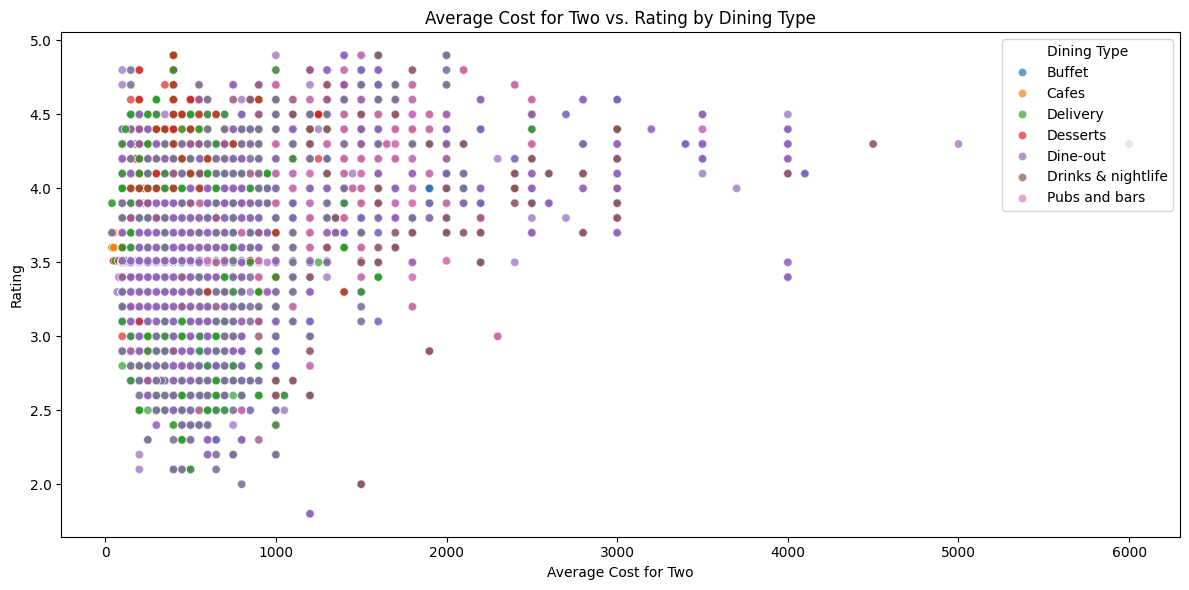

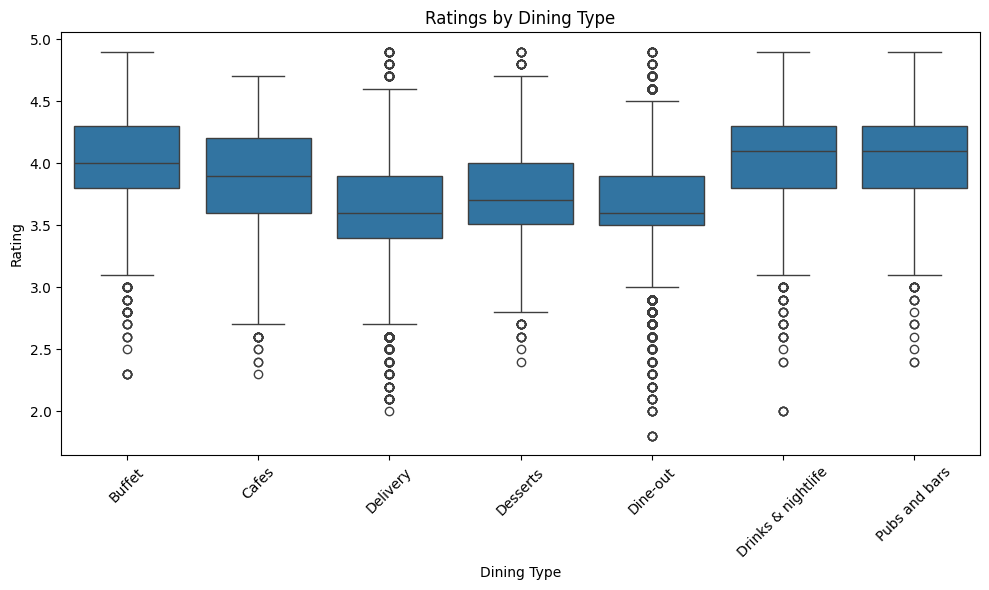

In [ ]:
# Research Questions - Ammar

# Question 1: How does the average cost for two affect the ratings of restaurants across different types?

import matplotlib.pyplot as plt
import seaborn as sns

# check that there are no na values in the features
print(df['approx_cost(for two people)'].isna().sum())
print(df['rate'].isna().sum())
print(df['listed_in(type)'].isna().sum())

# remove 0 ratings
df = df[df['rate'] > 0]

# Scatter plot: Cost for two vs. Rate
plt.figure(figsize = (12 , 6))
sns.scatterplot(data = df, x = 'approx_cost(for two people)' , y = 'rate' , hue = 'listed_in(type)' , alpha = 0.7)
plt.title('Average Cost for Two vs. Rating by Dining Type')
plt.xlabel('Average Cost for Two')
plt.ylabel('Rating')
plt.legend(title='Dining Type', loc='upper right')
plt.tight_layout()
plt.show()

# Box plot: Ratings across different dining types
plt.figure(figsize = (10 , 6))
sns.boxplot(data = df , x = 'listed_in(type)' , y = 'rate')
plt.title('Ratings by Dining Type')
plt.xlabel('Dining Type')
plt.ylabel('Rating')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

based on the following visualizations:
---
Scatter Plot -
we can see that the average cost for two ranged, with the majority of the ratings being approx. between 0 -1800 for the cost. the ratings ranged all the wat from 2-5, indicating that the cheaper meals didn't have a significant affect on the overall ratings for all of the dining types.

a dining type which was very visible in the scatter plot is the 'Dine-Out' restaurants.

another noticable point is with the outliers. as the average cost for two increased, the ratings were higher. this could indicate that the cost of a dining type had a significant affect on the overall experience of the diners, hence, the higher ratings for the restaurants at a higher cost.

---
Box Plot -
the box plots for all of the dining types had similar ratings for the lower and quartiles. in addition, the median ratings for the restaurant types were all somewhat similar.

the main noticable difference between each dining type's box plot are the outliers.

dining types like desserts, cafes, and buffets had less outliers than the other dining types. which might indicate a more consistent experience in these dining types as the ratings for these dining types were all between the box plot values, barring a few outliers.

dining types like dine-out, delivery, and drinks & nightlife had more outliers than the other dining types. which might indicate a less consistent experience in these dining types as the ratings were not consistent.

the dine-out dining type had the most outliers, with many ratings lower than the lower quartile, which means a lot of diners had a poor experience. in addition, there were some ratings above the upper quartile, which means some diners had an above-average experience.

---
final opinion -
higher costs may contribute to better ratings, especially for higher-end dining experiences, but this effect is not consistent across all dining types. the consistency and variability of ratings across dining types show important differences in customer expectations and satisfaction with various dining options.

0
0


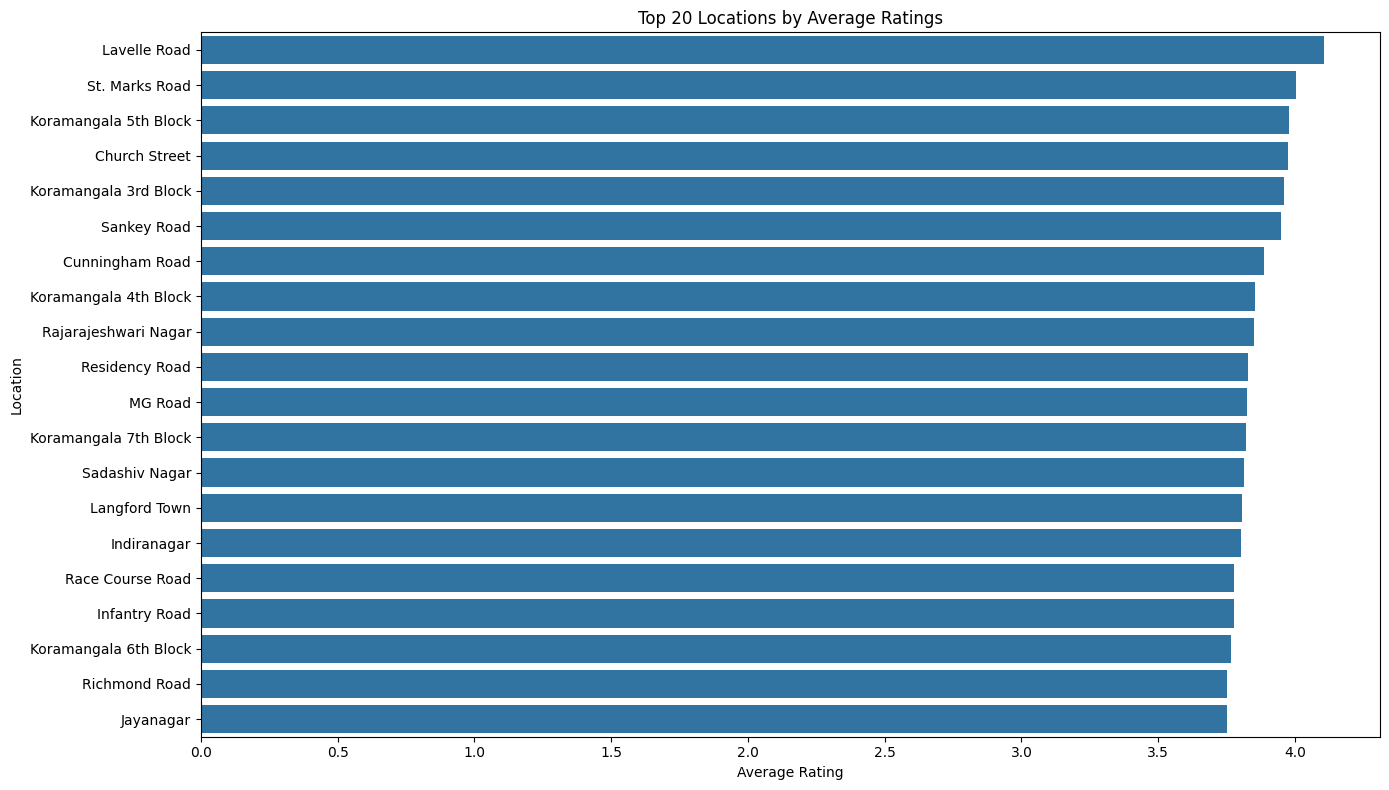

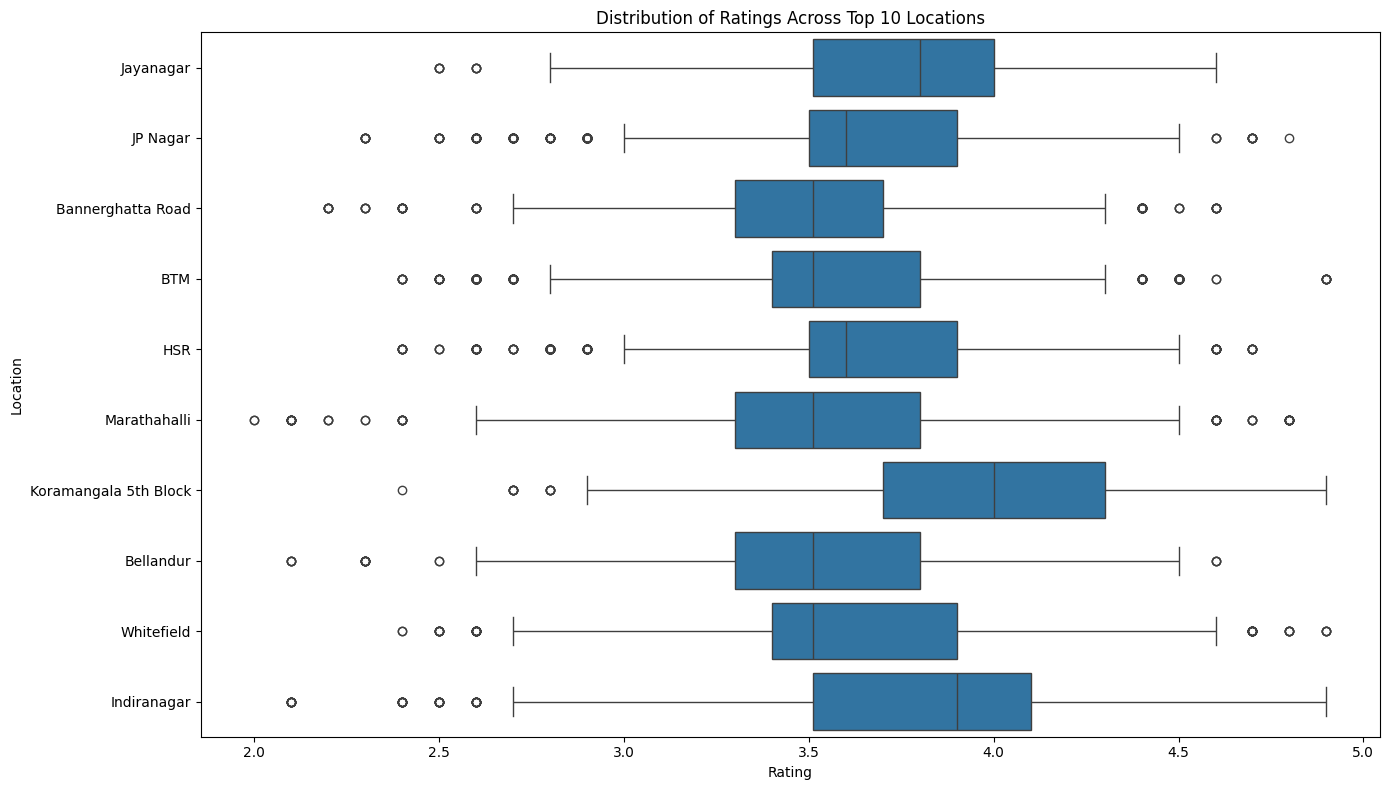

In [ ]:
# Question 2: Does the location of a restaurant influence its average rating?

# check for na values
print(df['location'].isna().sum())
print(df['rate'].isna().sum())

# calculate average rating for each location using the groupby function
location_ratings = df.groupby('location')['rate'].mean().sort_values(ascending = False).reset_index()

# bar plot for average ratings by location
plt.figure(figsize = (14 , 8))
top_locations = location_ratings.head(20)  # show top 20 locations
sns.barplot(data = top_locations , x = 'rate' , y = 'location')
plt.title('Top 20 Locations by Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

# Select top 10 locations by count for easier visualization
top_10_locations = df['location'].value_counts().head(10).index
filtered_df = df[df['location'].isin(top_10_locations)]

# box plot for ratings across top 10 locations
plt.figure(figsize = (14 , 8))
sns.boxplot(data = filtered_df , x = 'rate' , y = 'location')
plt.title('Distribution of Ratings Across Top 10 Locations')
plt.xlabel('Rating')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

from the visualizations, we can see that location has a slight influence on the ratings. some areas such as Lavelle Road and St. Marks Road show consistently higher ratings. areas like Jayanagar have a wider spread, indicating less consistency in the quality of restaurants in that location.

this variation in ratings based on location can be important when considering customer expectations, dining experience consistency, and the types of restaurants located in these areas.